Fundamentals of Data Analysis Project 2020

Student : Michelle Moran 

Task details : 


Perform and explain simple linear regression using Python on the powerproduction dataset

Goal : Accurately predict wind turbine output from wind speed values using the data set as a basis.
Using GIT repository  for the submission including the following items : 

1. Jupyter notebook that performs simple linear regression on the data set
2. An explanation of your regression and an analysis of the accuracy
3. Standard items in a git repository such as a README
4. Compare a simple linear regression to other types of regression on this data set


<br>

The Powerproduction Dataset 

.........


### 1.Introduction  [6]

For this project , We will start/ use a simple linear regression to determine whether it can fit the particular type of curve in the dataset. 

Simple linear regression is a statistical model that allows us to summarize and study relationships between 2 continuous variables. In our dataset case the powerproduction of wine turbines,  the variables are wind speed and the turbine power output.

#### Variables defined :

X variable is wind speed and this can be regarded as the predictor or independent variable
Y variable is the response or dependent variable and here it represents the power output of the turbine.

While linear regression can model curves , it is relatively restricted in the shapes of the curves that it can fit. If the curve isnt an accurate fit , a non linear regression can be examined , where there are many more options of curves  to find the best fit and to interpret the role of the independent variables. Also must be aware in regression of underfitting and overfitting a line to datapoints. 

#### Correlation
By analyzing any two features of a dataset such as wind speed and power , there will some sort of Correlation , albeit negative , postive , or weak versions of these. There are three examples of correlation coefficients : 

   - Pearson’s r  - measures linear correlation between 2 variables, value of +1 ( total positive linear )and -1 ( total   negative linear) and 0- no correlation.
 - Spearman’s rho - measures monotonic relationships ( whether linear or not). Compares the ranks of data 
 - Kendall’s tau - measures the ordinal association between two measured quantities.Compares the ranks of data




There are 4 assumptions of linear regression : 

1. Linear Relationship : 

Is there a linear relationship between the independent variable x, and the dependent variable , y ? 

In order to determine this we create a scatter plot of x vs y. So for the dataset powerproduction , we created a scatter plot between the wind speed and power. We see that the points on the plot do not fall on a straight line which indicates that it is not a linear relationship but that there is a relationship between the two variables. There are two options here  : 

   -  To apply a nonlinear transformation to the independent and/or dependent variables. examples include taking the log or squareroot of either variable
 - Add another independent variable to the model
 
 
2. Independence

Are the residuals independent? 

When a simple linear regression is done, you get a line of best fit. The points dont fall exactly on the regression line , they are scatter about. A residual is the difference between the observed value and the mean value that the model predicts for that observation , negative if its below , positive if above and it zero residual if its on the line itself. Residuals are sometimes referred to as errors , which is an unexplained difference between the datapoint and the line. 

 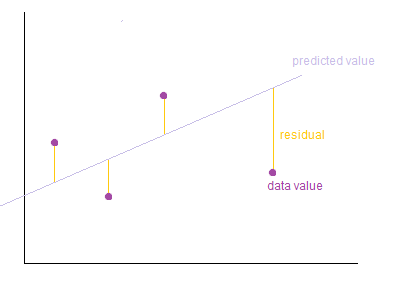

3. Homoscedasticity

Do the residuals have a constant variance at every level of x ? The opposite case to this is called heteroscedastivity and the results of the analysis become hard to trust, as it increases the variance of the regression coefficient estimates.
To detect this , a fitted value vs, residual plot is create. If you see a cone shape in the results were the residuals spread out as the fitted value increases . To overcome this : 

 - Transform the dependent variable : taking the log of the dependent variable for example
 - Redefine the dependent variable
 - use a weighted regression
 
 4. Normality
 
 Are the residuals normally distributed ?
 
 This can be checked using Q-Q plots or using formal statiscal tests like Shapiro-Wilk ( sensitive to larger sample sizes). 





Along with simple linear regression, we have multiple linear regression which has two or more independent variables and polynomial regression which is a generalised case of linear regression.

Im going to use 6 steps to build a Simple Linear Regression Model : 

Step 1. Importing the dataset
Step 2. Data Pre-processing
Step 3. Visualize the data
Step 4. Fitting the linear regression model to the training sets

#### Step 1 Importing the PowerProduction Dataset 

Import the pandas library - this provides a easy to use data structures and data analysis tools

In [12]:
import pandas as pd
dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
dfpower[0:6]

#dfpower.shape
dfpower.describe


<bound method NDFrame.describe of       speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]>

#### Step 2 Data pre-processing [8]

This is not necessary for this dataset - However we did examine the data to see if there was any outliers using scipy-stats .Using Z- scores and interquartile range methods to check if outliers are present.

Conclusion : 

Using both methods resulted in the same conclusion , there was no outliers present to remove from the data as the shape returned ( 500,2) for all.

In [56]:
import scipy.stats as stats

#find absolute value of z-score for each observation
z = np.abs(stats.zscore(dfpower))


#only keep rows in dataframe with all z-scores less than absolute value of 3 
data_clean = dfpower[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(500, 2)

In [46]:
#find Q1, Q3, and interquartile range for each column
Q1 = dfpower.quantile(q=.25)
Q3 = dfpower.quantile(q=.75)
IQR = dfpower.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
data_clean = dfpower[~((dfpower < (Q1-1.5*IQR)) | (dfpower > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
data_clean.shape

(500, 2)

### Step 3: Visualizing the test results

#### Visualise the Data - scatterplot to get an understanding of the data

Import matplotlib.pyplot 

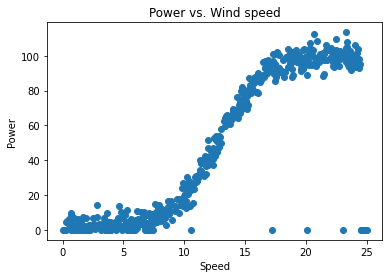

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [88]:
import scipy.stats
import matplotlib.pyplot as plt

plt.scatter(dfpower.speed, dfpower.power)
plt.title('Power vs. Wind speed')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()

plt.figure(figsize=(20,10))



Correlation coefficients : 

These quantify the relationships between the variables of the dataset. Results below are postive and close to 1. This indicates a positive relatonship between the variables, that is when one variable increases so will the other.

In [80]:
scipy.stats.pearsonr(x, y) # Pearson's r

(0.8537775037188595, 2.8596889641534797e-143)

In [62]:
scipy.stats.spearmanr(x, y)   # Spearman's rho

SpearmanrResult(correlation=0.8187276026588616, pvalue=4.4287029757150813e-122)

In [67]:
scipy.stats.kendalltau(x, y)  # Kendall's tau

KendalltauResult(correlation=0.7275042154337987, pvalue=1.630169049999099e-129)

#### Fitting a simple linear regression model 

From the scatter plot above , there does seem to be a linear part of the graph demonstrating a relationship between wind speed and powerout , where the power increases as the windspeed increase, however it is not obviously linear. The first observation would be a sigmoid curve. Following this would be to try and best fit a line to the data points with overfitting or underfitting. 


Using Statmodels

Text(0, 0.5, 'power')

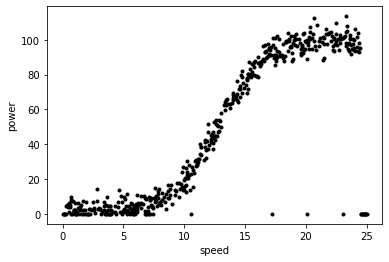

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power



plt.plot(x,y, 'k.')


    
# Add axis labels.
plt.xlabel('speed')
plt.ylabel('power')




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats



dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power


#fit simple linear regression model
model = ols('speed ~ power', data=dfpower).fit()

#view model summary
print(model.summary())

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'power', fig=fig)

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power


z = np.polyfit(x, y, 1)

plt.plot(dfpower.speed,dfpower.power, 'k.')
plt.plot(z)

    
Add axis labels.
plt.xlabel('speed')
plt.ylabel('power')






The graph above shows us that there is very little power when the speed is less than 10 meters per second and after 17 meters per second you are not generating any extra power. One would think the faster the wind turbine the more power you would generate but this is not the case. The most power generated is between the speeds of 10 and less than 20 meters per second.

To look at other types of regression on this data set. The above scatter plot shows that the relationship between the variables are not a simple linear one .

The graph above shows us that there is very little power when the speed is less than 10 meters per second and after 17 meters per second you are not generating any extra power. One would think the faster the wind turbine the more power you would generate but this is not the case. The most power generated is between the speeds of 10 and less than 20 meters per second. 

To look at other types of regression on this data set. The above scatter plot shows that the relationship between the variables are not a simple linear one . 

Other types of regressions are polynomial and logisical .

NB: We look at the method of R-squared value to calculate the accuracy of the model used. This value is a number between 0 and 1. , and the closer you are to 1 , the more accurate the linear regression model is. We have to use Sklearn to determine this value as it is not implementede in NUMPY. 

1. Polynomial Regression 

Using NumPy Polyfit() Method to fit our data inside a polynomial function. It least squares the polynomial fit. It fits a polynomial p(x) of degree deg to points(x,y). This method returns a vector of coefficients p that minimises the squared error in the order of deg, deg-1, ... 0.

The syntax:

numpy.polyfit (X, Y, deg, rcond=None, full=False, w=None, cov=False)


coefficient value in case of linear polynomial:
 [  4.91759567 -13.89990263]


0.7289360258564073

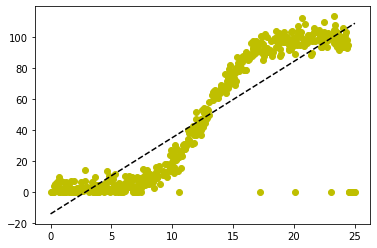

In [58]:
import seaborn as sns

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")
dfpower[0:6]
x = dfpower.speed
y = dfpower.power


# calculating value of coefficients in case of linear polynomial - 2 constants
z = np.polyfit(x, y, 1) # the last argument is the degree of polynomial
poly1d_fn = np.poly1d(z)
print("\ncoefficient value in case of linear polynomial:\n", z)

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

#calculating the accuracy of the linear polynomial model using r2 values
predict=np.poly1d(z)
from sklearn.metrics import r2_score
r2_score(y, predict(x))


#0.7289360258564072

#np.corrcoef(x, y)[0][1]**2


          2
-0.07022 x + 6.674 x - 21.23


0.7351940425885428

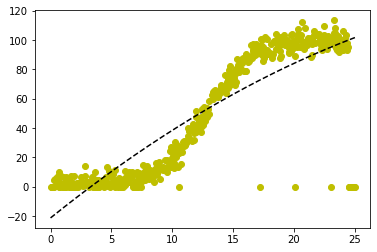

In [36]:
# calculating value of coefficient in case of cubic polynomial - 3 constants

x = dfpower.speed
y = dfpower.power

z = np.polyfit(x,y,2)
poly1d_fn = np.poly1d(z) 
print(poly1d_fn)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')


#calculating the accuracy of the cubic polynomial model using r2 values
predict=np.poly1d(z)
from sklearn.metrics import mean_squared_error, r2_score
r2_score(y, predict(x))



          3         2
-0.05242 x + 1.895 x - 12.94 x + 19.2


0.8796883953739737

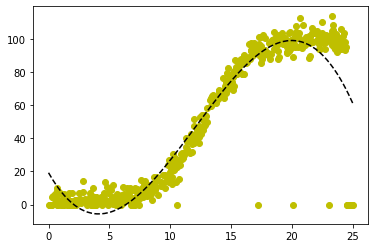

In [34]:
# calculating value of coefficient in case of quadratic polynomial - 4 constants


z = np.polyfit(x,y,3)
poly1d_fn = np.poly1d(z) 
print(poly1d_fn)
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

#calculating the accuracy of the quadratic polynomial model using r2 values
predict=np.poly1d(z)
from sklearn.metrics import r2_score
r2_score(y, predict(x))


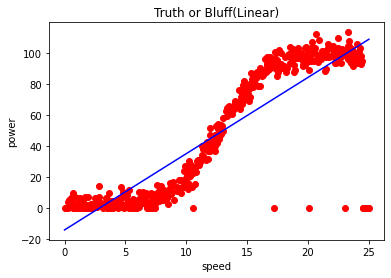

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

import matplotlib.pyplot as plt

dfpower =pd.read_csv("https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv")

x = dfpower.speed
y = dfpower.power

x = x.values.reshape(-1, 1)
y = y.values.reshape(-1, 1)

regressor = LinearRegression()
regressor.fit(x,y) #actually produces the linear eqn for the data


plt.scatter(x,y, color='red')
plt.plot(x, lin_reg.predict(x),color='blue')
plt.title("Truth or Bluff(Linear)")
plt.xlabel('speed')
plt.ylabel('power')
plt.show()

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
x_poly = poly_reg.fit_transform(x)
x

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

In [24]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression()

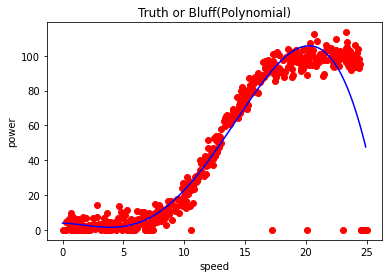

In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
 
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape(len(x_grid),1) 
plt.scatter(x,y, color='red') 
 
plt.plot(x_grid, lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue') 
 
plt.title("Truth or Bluff(Polynomial)")
plt.xlabel('speed')
plt.ylabel('power')
plt.show()

In [27]:
#predictions : 

lin_reg.predict([[15]])



array([[59.86403235]])

In [32]:
lin_reg2.predict( poly_reg.fit_transform([[15]]))


array([[70.58313295]])

<AxesSubplot:xlabel='wind', ylabel='power'>

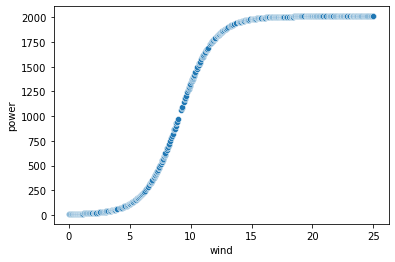

In [42]:
import numpy as np
import pandas as pd


a,m,n,t =2011.1 ,2.6650,622.922,1.4090
u=dfpower.speed
p_u =a * (1.0 +m*np.exp(-u/t))/(1.0 +n* np.exp(-u/t))
df2=pd.DataFrame({"wind":u,"power":p_u})
df2


import seaborn as sns
sns.scatterplot( data =df2 ,x="wind",y="power")

References : 




[1] https://learnonline.gmit.ie/course/view.php?id=1120#section-10 - Topic 4  Datasets - Plotting the equation . Ian Mcloughlin 

[2] https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

[3] https://www.codespeedy.com/numpy-polyfit-in-python/

[4] https://appdividend.com/2020/06/03/numpy-polyfit-method-in-python/#:~:text=Numpy%20polyfit%20%28%29%20method%20is%20used%20to%20fit,error%20in%20the%20order%20deg%2C%20deg-1%2C%20%E2%80%A6.%200.

[5] https://data36.com/linear-regression-in-python-numpy-polyfit/

[6] https://www.askpython.com/python/examples/polynomial-regression-in-python#:~:text=%20A%20Simple%20Example%20of%20Polynomial%20Regression%20in,are%20using%20this%20to%20compare%20the...%20More%20

[7] https://iq.opengenus.org/polynomial-regression-using-scikit-learn/

[8] https://www.statology.org/remove-outliers-python/

[9] http://wiki.engageeducation.org.au/further-maths/data-analysis/residuals/ - image reference